In [5]:
import tensorflow as tf
from tensorflow_probability import distributions as tfd
import tensorflow_probability as tfp
import tensorflow.keras.backend as K
import math as m
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [12]:
sigma_z_prior = 1
pi = np.pi

In [15]:
def generate_data(is_simple, N, alpha, sigma_reward):
  if is_simple:
    z_ = tfd.Sample(
      tfd.Independent(
          tfd.Normal(loc=[0, 0], scale=[sigma_z_prior, sigma_z_prior])))
    z = z_.sample(N)

    gamma_0 = 1
    r = np.zeros(N)
    for i in range(N):
      r_ = tfd.Sample(
        tfd.Independent(
            tfd.Normal(loc=gamma_0*z[i, 0], scale=sigma_reward)))
      r[i] = r_.sample(1)
  else:
      z_ = tfd.Sample(
      tfd.Independent(
          tfd.Normal(loc=[0, 0], scale=[sigma_z_prior, sigma_z_prior])))
      z = z_.sample(N)
    
      gamma_0 = np.array([np.cos(alpha), np.sin(alpha)])
      r = np.zeros(N)
      for i in range(N):
        r_ = tfd.Sample(
          tfd.Independent(
              tfd.Normal(loc = gamma_0[0]*z[i, 0] + gamma_0[1]*z[i, 1], scale=sigma_reward)))
        r[i] = r_.sample(1)
  return z, r

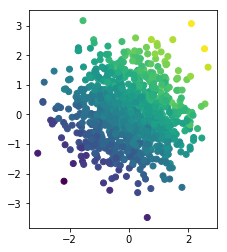

In [21]:
data = generate_data(is_simple=False, N=1000, alpha=0.9, sigma_reward=.2);
plt.scatter(*np.array(data[0]).T,c=data[1])
plt.axes().set_aspect('equal')
